In [ ]:
!pip install prophet


In [ ]:
!pip uninstall -y numpy scipy scikit-learn


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install numpy==1.23.5 scipy==1.10.1 scikit-learn==1.2.2


In [ ]:
!pip install pmdarima

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 93.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv")


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df.fillna(0, inplace=True)

In [ ]:
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

In [ ]:
service_totals = df[service_columns].sum()


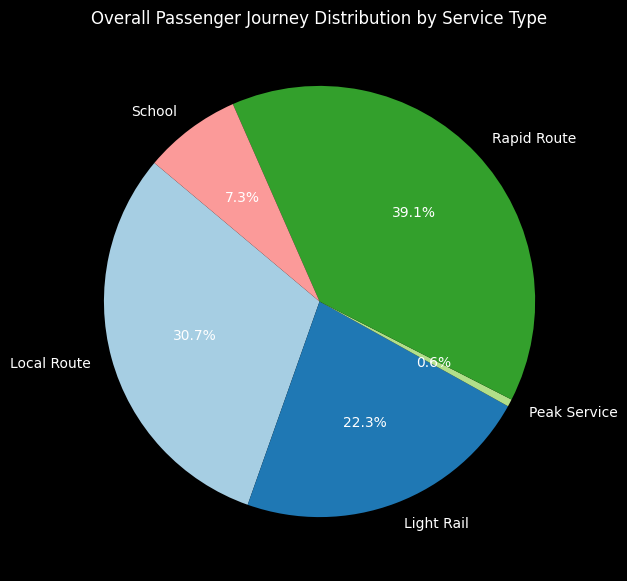

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(service_totals, labels=service_totals.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Overall Passenger Journey Distribution by Service Type")
plt.show()

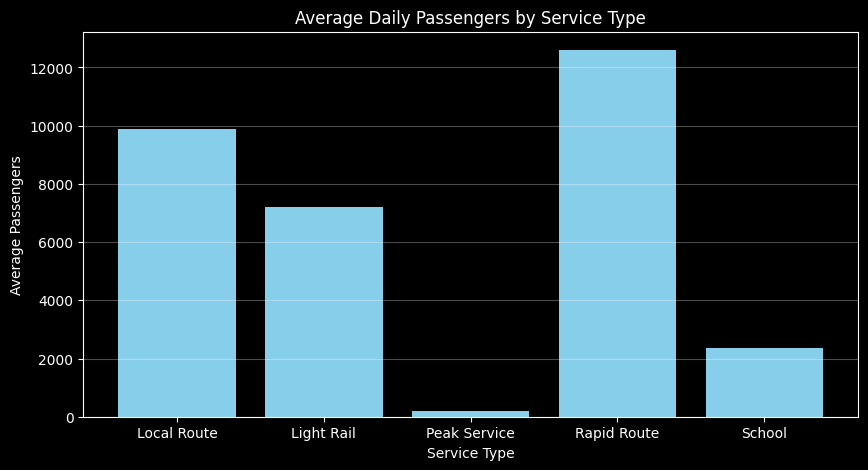

In [ ]:
avg_daily = df[service_columns].mean()

plt.figure(figsize=(10,5))
plt.bar(avg_daily.index, avg_daily.values, color='skyblue')
plt.title("Average Daily Passengers by Service Type")
plt.ylabel("Average Passengers")
plt.xlabel("Service Type")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [ ]:
def forecast_service(service_name):
    print(f"\n📊 Forecasting for: {service_name}")

    service_df = df[['Date', service_name]].rename(columns={'Date': 'ds', service_name: 'y'})

    model = Prophet(daily_seasonality=True)
    model.fit(service_df)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)

    plt.figure(figsize=(12, 6))
    plt.plot(service_df['ds'], service_df['y'], label='Actual', color='skyblue', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', linestyle='--', linewidth=2)
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                     color='orange', alpha=0.2, label='Confidence Interval')

    plt.title(f"🔮 7-Day Forecast for {service_name}", fontsize=15, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel('Passenger Count')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    next_week = forecast[['ds', 'yhat']].tail(7)
    plt.figure(figsize=(10,4))
    plt.bar(next_week['ds'].dt.strftime('%Y-%m-%d'), next_week['yhat'], color='orange')
    plt.title(f"7-Day Forecast Passenger Count for {service_name}")
    plt.xlabel("Date")
    plt.ylabel("Predicted Passengers")
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Return the next 7 days forecast rounded
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7).round(2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/0i2hecu9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/rx3ppj7f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83883', 'data', 'file=/tmp/tmpog_pmslo/0i2hecu9.json', 'init=/tmp/tmpog_pmslo/rx3ppj7f.json', 'output', 'file=/tmp/tmpog_pmslo/prophet_modelsw_fxie4/prophet_model-20250526060654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



📊 Forecasting for: Local Route


06:06:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-38-53409edfc19a>:27: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


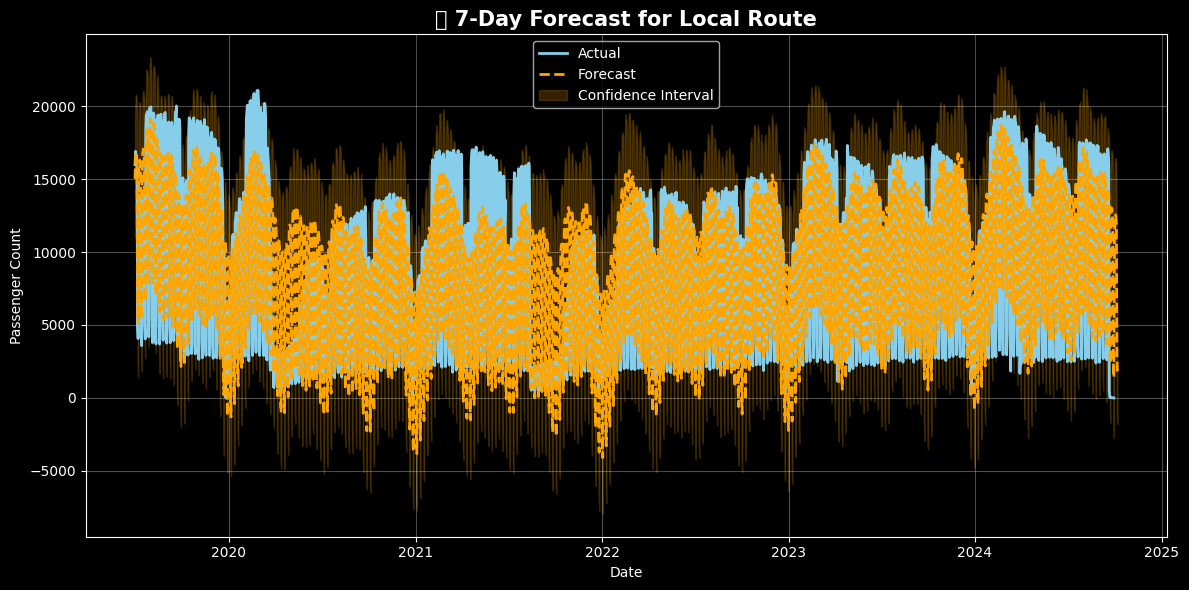

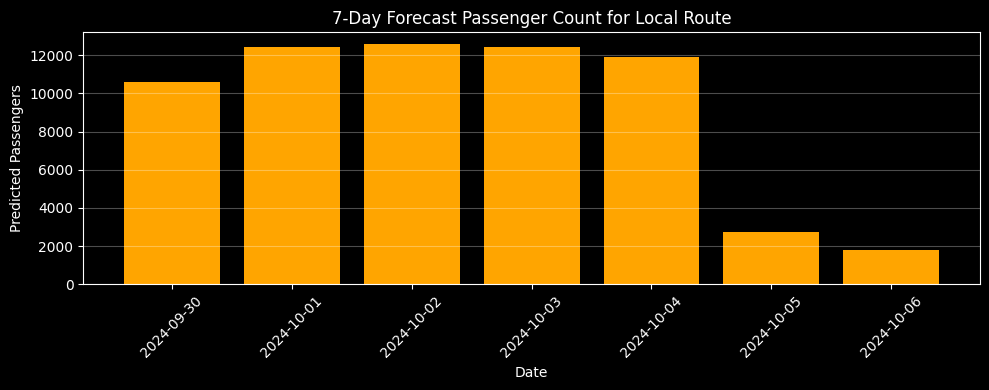

,ds,yhat,yhat_lower,yhat_upper
1918,2024-09-30,10604.95,6600.00,14703.86
1919,2024-10-01,12400.86,8477.05,16204.64
1920,2024-10-02,12566.01,8603.35,16385.94
1921,2024-10-03,12416.32,7968.48,16444.56
1922,2024-10-04,11887.57,8201.74,15648.44
1923,2024-10-05,2740.27,-1237.62,6818.63
1924,2024-10-06,1815.88,-1776.90,5821.15


DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/meq5aql7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/i4bok954.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13344', 'data', 'file=/tmp/tmpog_pmslo/meq5aql7.json', 'init=/tmp/tmpog_pmslo/i4bok954.json', 'output', 'file=/tmp/tmpog_pmslo/prophet_model3qihbf1u/prophet_model-20250526060657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



📊 Forecasting for: Light Rail


06:06:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-38-53409edfc19a>:27: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


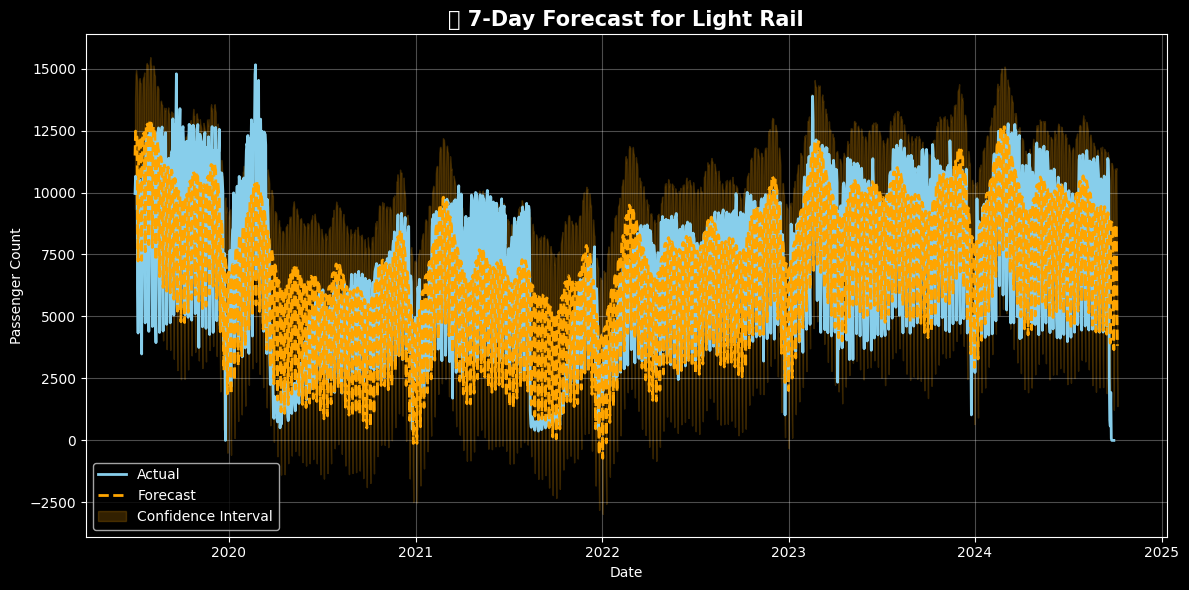

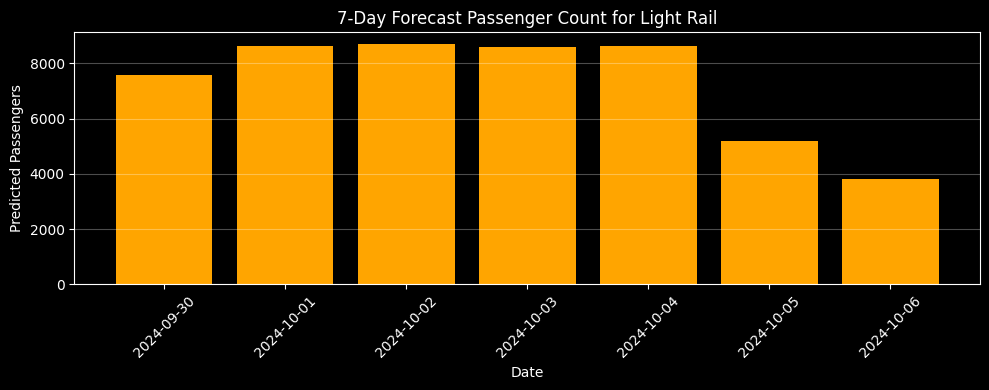

,ds,yhat,yhat_lower,yhat_upper
1918,2024-09-30,7590.70,5136.93,9950.36
1919,2024-10-01,8644.58,6277.95,10966.33
1920,2024-10-02,8687.17,6529.17,10915.93
1921,2024-10-03,8606.46,6371.50,10900.27
1922,2024-10-04,8636.44,6501.50,10986.34
1923,2024-10-05,5172.42,2838.80,7536.26
1924,2024-10-06,3814.74,1385.02,6183.61


DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/wvtyn8w9.json



📊 Forecasting for: Peak Service


DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/nx3dgxsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10122', 'data', 'file=/tmp/tmpog_pmslo/wvtyn8w9.json', 'init=/tmp/tmpog_pmslo/nx3dgxsy.json', 'output', 'file=/tmp/tmpog_pmslo/prophet_model7ye1ahzo/prophet_model-20250526060659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:06:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:06:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-38-53409edfc19a>:27: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print

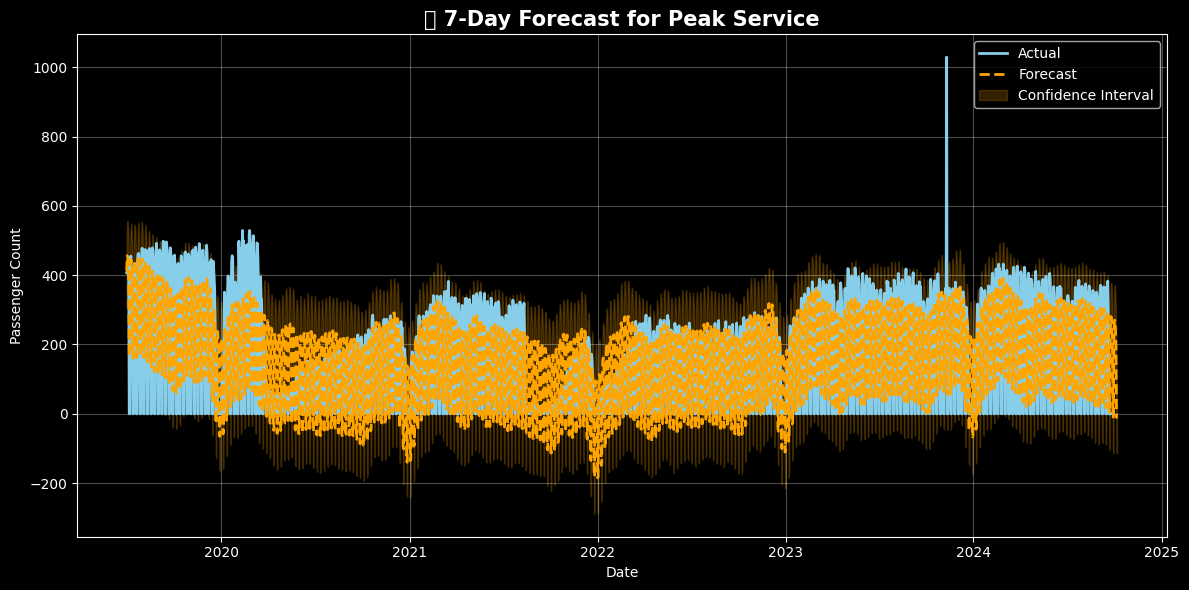

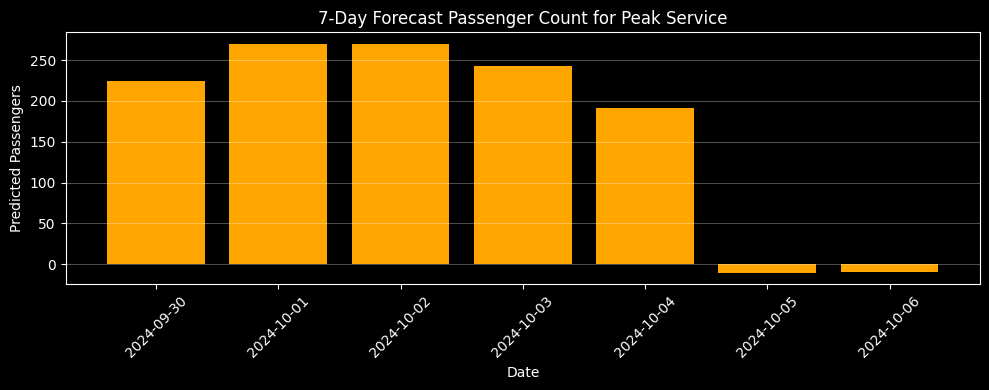

,ds,yhat,yhat_lower,yhat_upper
1918,2024-09-30,224.43,120.50,317.37
1919,2024-10-01,269.88,174.83,371.06
1920,2024-10-02,269.65,165.47,372.05
1921,2024-10-03,243.11,146.52,342.15
1922,2024-10-04,191.46,97.72,293.51
1923,2024-10-05,-10.43,-109.57,94.25
1924,2024-10-06,-9.04,-114.09,92.72


DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/2t1_8hpv.json



📊 Forecasting for: Rapid Route


DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/zs38rm7g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65524', 'data', 'file=/tmp/tmpog_pmslo/2t1_8hpv.json', 'init=/tmp/tmpog_pmslo/zs38rm7g.json', 'output', 'file=/tmp/tmpog_pmslo/prophet_modelnksfva0v/prophet_model-20250526060702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:07:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-38-53409edfc19a>:27: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print

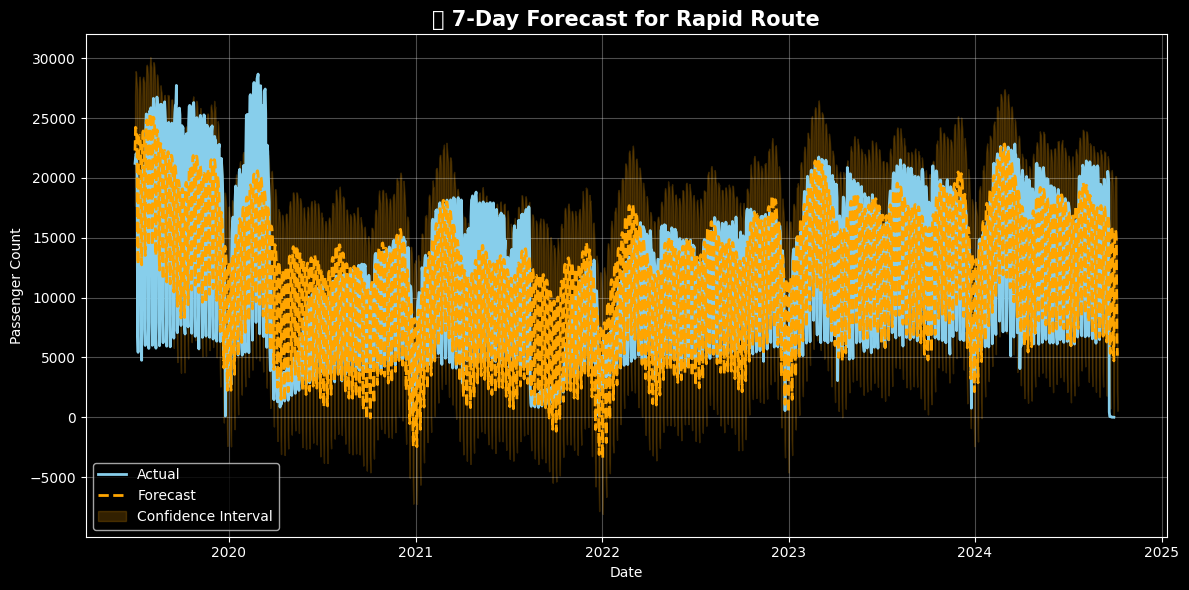

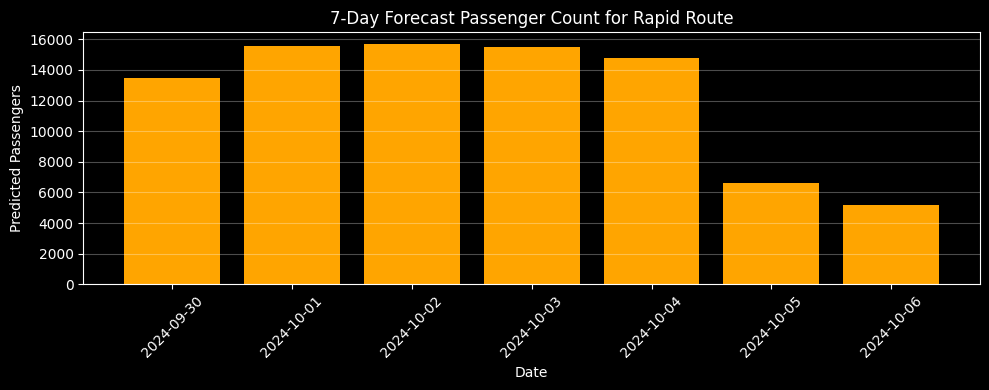

,ds,yhat,yhat_lower,yhat_upper
1918,2024-09-30,13476.15,9336.29,18037.85
1919,2024-10-01,15584.16,10972.45,19940.59
1920,2024-10-02,15672.09,11238.79,20156.21
1921,2024-10-03,15483.65,11028.64,20147.47
1922,2024-10-04,14777.91,10188.27,19903.27
1923,2024-10-05,6592.75,2232.52,11130.91
1924,2024-10-06,5144.64,543.22,9753.80


DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/fsm4l4i_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpog_pmslo/_sm316c5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75959', 'data', 'file=/tmp/tmpog_pmslo/fsm4l4i_.json', 'init=/tmp/tmpog_pmslo/_sm316c5.json', 'output', 'file=/tmp/tmpog_pmslo/prophet_modelyyo6q2xa/prophet_model-20250526060704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:07:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



📊 Forecasting for: School


06:07:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-38-53409edfc19a>:27: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


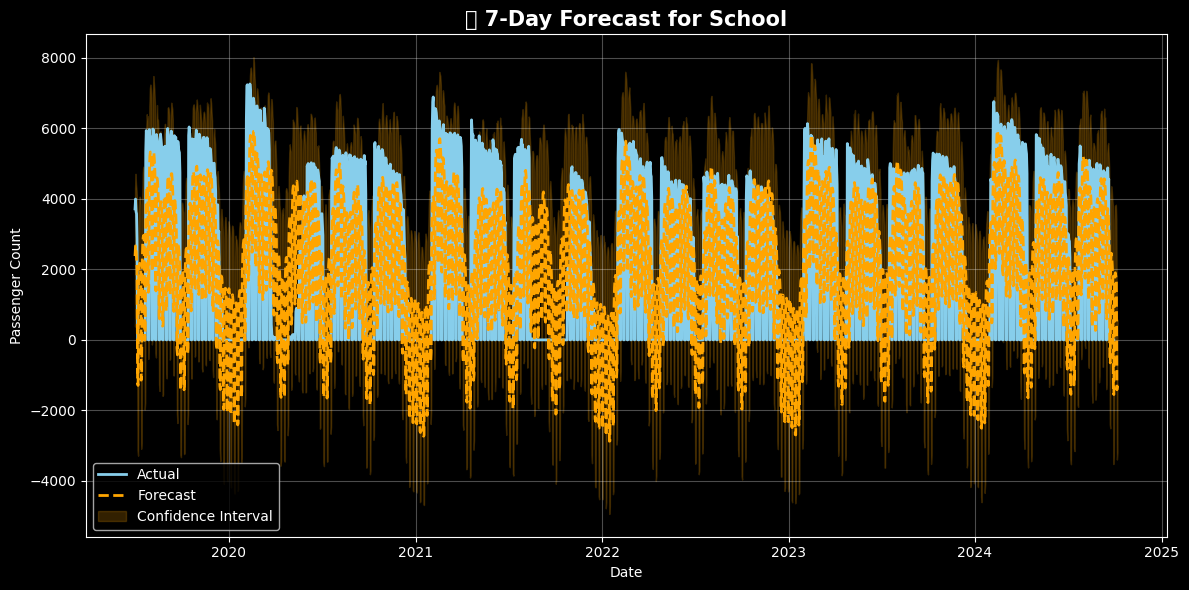

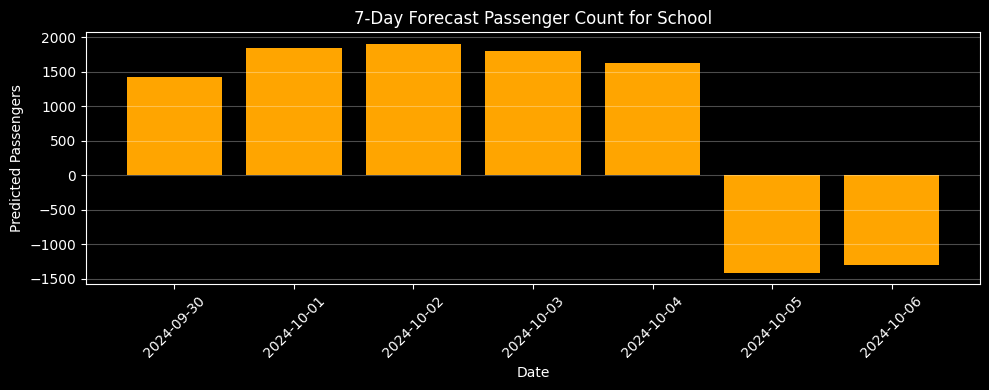

,ds,yhat,yhat_lower,yhat_upper
1918,2024-09-30,1417.82,-586.05,3372.13
1919,2024-10-01,1842.16,49.03,3807.35
1920,2024-10-02,1902.88,160.79,3798.77
1921,2024-10-03,1805.43,-232.02,3834.18
1922,2024-10-04,1623.43,-264.08,3435.85
1923,2024-10-05,-1416.06,-3393.38,399.59
1924,2024-10-06,-1307.48,-3185.77,578.30


In [ ]:
all_forecasts = {}

for service in service_columns:
    forecast = forecast_service(service)
    display(forecast)
    all_forecasts[service] = forecast

combined = pd.concat(all_forecasts, axis=0)
combined.to_csv("7_Day_Forecasts_All_Services.csv")